In [13]:
import sys, platform, os
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
import useful_functions as uf
import pysm3
from fgbuster import (CMB, Dust, Synchrotron, basic_comp_sep,get_observation, get_instrument)
from fgbuster.visualization import corner_norm
nside=16

In [14]:
input_folder="/home/amorelli/foreground_noise_maps/noise_maps_d0s0_train/"
input_files=os.listdir(input_folder)
for j in range(len(input_files)):
        input_files[j]=input_folder+"/"+input_files[j]

print(input_files)

In [15]:
n_pix=hp.nside2npix(16)
f_ = [np.load(input_file) for input_file in input_files]
label=f_[0].files[0]
data_example=f_[0][label]
dim_example=len(data_example)
n_input=len(f_)*dim_example #numero di tutte le mappe di input
data=np.zeros((n_input,n_pix,data_example.shape[-1]))

In [16]:
for i,file in enumerate(f_):
            data[i*dim_example:(i+1)*dim_example]=file[label]

hp.mollview(data[0,:,0])

In [18]:
mean_map_Q=np.zeros(n_pix)
sigma_map_Q=np.zeros(n_pix)
mean_map_U=np.zeros(n_pix)
sigma_map_U=np.zeros(n_pix)
for i in range(n_pix):
    mean_map_Q[i]=np.mean(data[:,i,0])
    sigma_map_Q[i]=np.std(data[:,i,0])
    mean_map_U[i]=np.mean(data[:,i,1])
    sigma_map_U[i]=np.std(data[:,i,1])

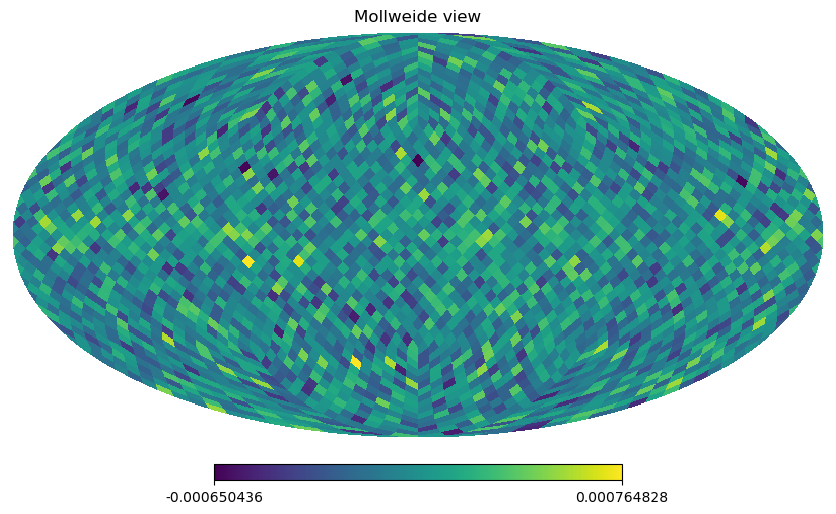

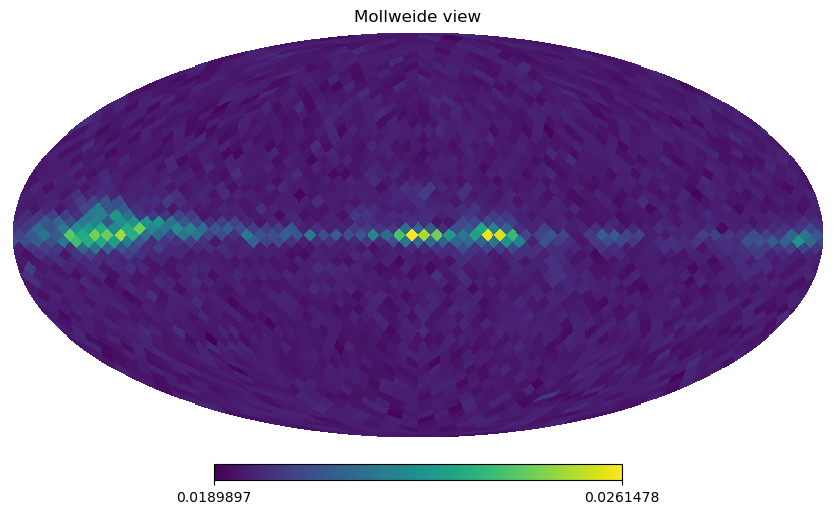

In [19]:
hp.mollview(mean_map_Q)
hp.mollview(sigma_map_Q)

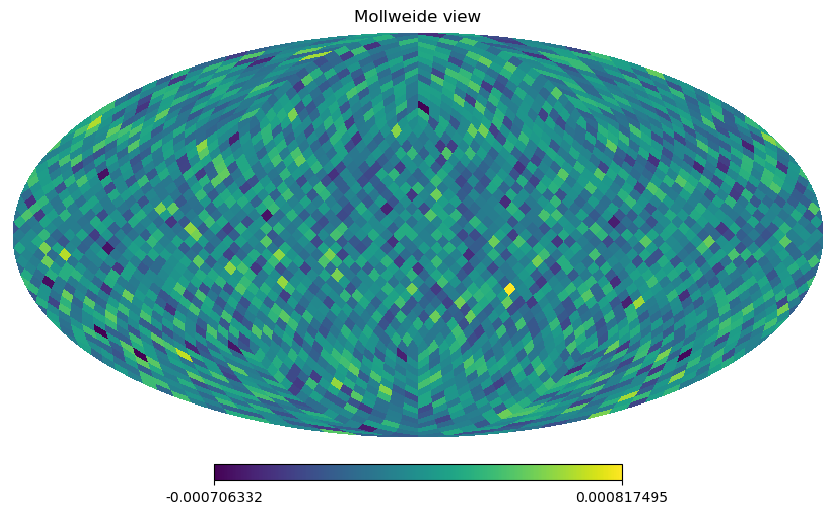

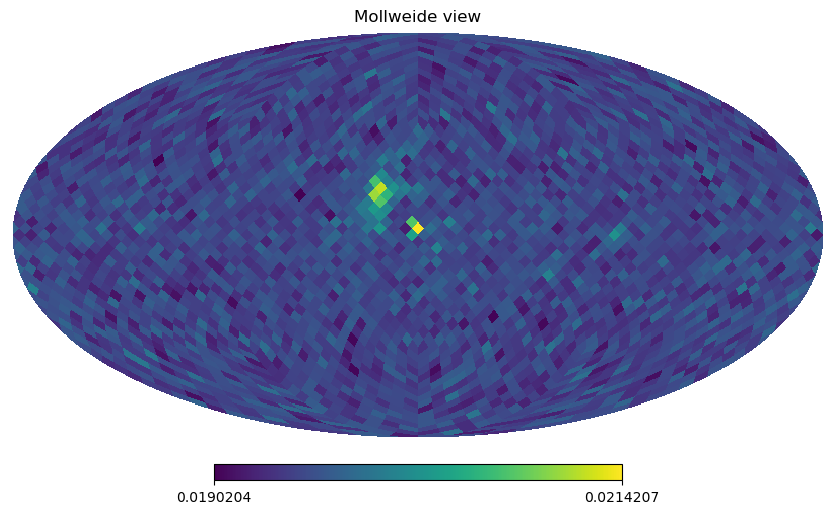

In [20]:
hp.mollview(mean_map_U)
hp.mollview(sigma_map_U)

In [22]:
np.savez("/home/amorelli/foreground_noise_maps/std_maps",mean_Q=mean_map_Q,mean_U=mean_map_U,sigma_Q=sigma_map_Q, sigma_U=sigma_map_U)

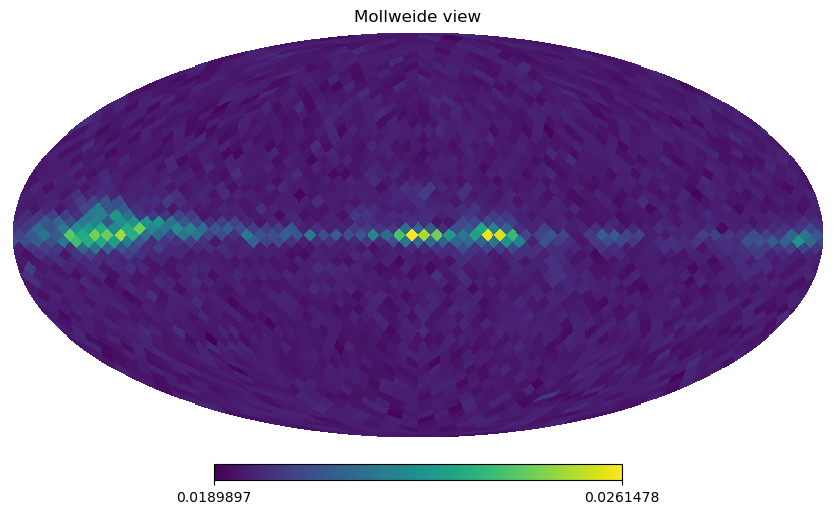

In [25]:
f_test=np.load("/home/amorelli/foreground_noise_maps/std_maps.npz")
map_Q=f_test["sigma_Q"]
hp.mollview(map_Q)